In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# グラフを描画するライブラリ
from matplotlib import pyplot as plt

sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# グラフの日本語表記
from matplotlib import rcParams

# 再帰的に回帰分析を実行するための関数の読み込み

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = "Meiryo"

In [3]:
# 表示設定
np.set_printoptions(linewidth=60)
pd.set_option("display.width", 60)

from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 8, 4

In [ ]:
import logging

# matplotlibのフォントマネージャーのログレベルを「ERROR」以上に設定する
# （＝警告レベルのメッセージは表示しないようにする）
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

In [6]:
ar_data = pd.read_csv(
    "4-2-1-ar-data.csv", index_col="date", parse_dates=True, dtype="float"
)


In [8]:
ar_data.index.freq = "D"


In [12]:
print(ar_data.head())

                posi      nega
date                          
2023-01-01  1.788628 -0.231497
2023-01-02  1.867413  0.680778
2023-01-03  1.590428 -1.115185
2023-01-04 -0.591151  2.312491
2023-01-05 -0.750309 -2.169583


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>],
      dtype=object)

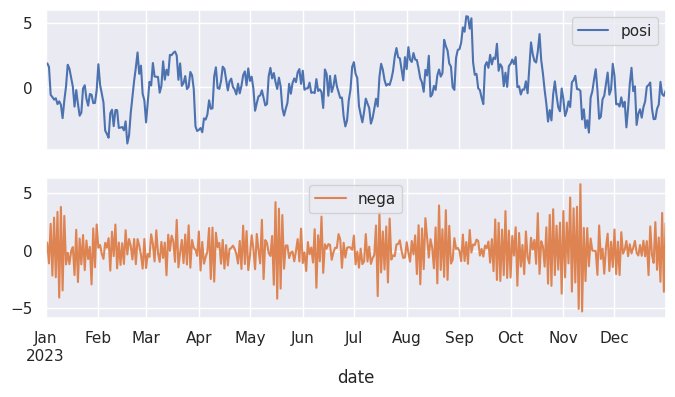

In [15]:
ar_data.plot(subplots=True)

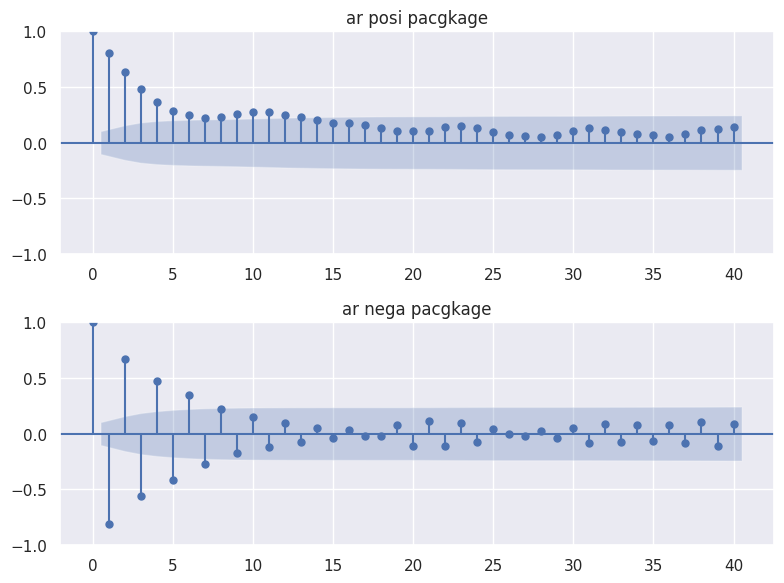

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True)

_ = sm.graphics.tsa.plot_acf(
    ar_data["posi"], lags=40, title="ar posi pacgkage", ax=ax[0]
)
_ = sm.graphics.tsa.plot_acf(
    ar_data["nega"], lags=40, title="ar nega pacgkage", ax=ax[1]
)

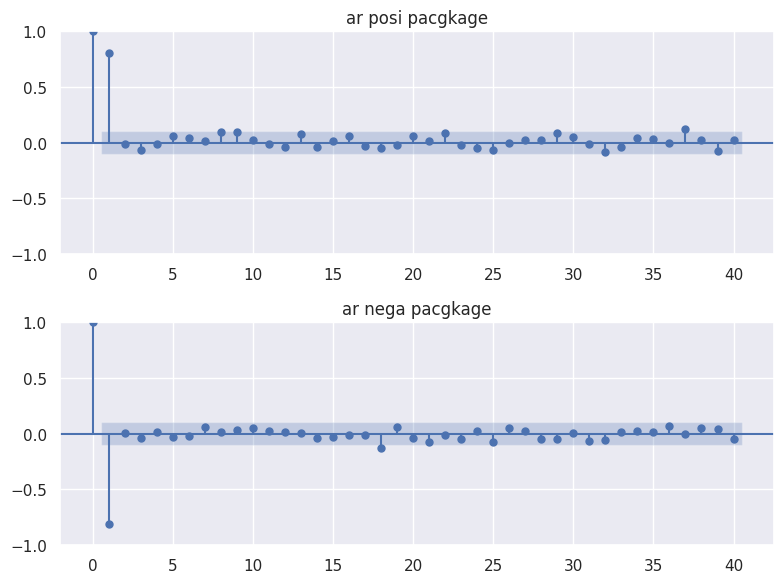

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True)

_ = sm.graphics.tsa.plot_pacf(
    ar_data["posi"], lags=40, title="ar posi pacgkage", ax=ax[0]
)
_ = sm.graphics.tsa.plot_pacf(
    ar_data["nega"], lags=40, title="ar nega pacgkage", ax=ax[1]
)


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>],
      dtype=object)

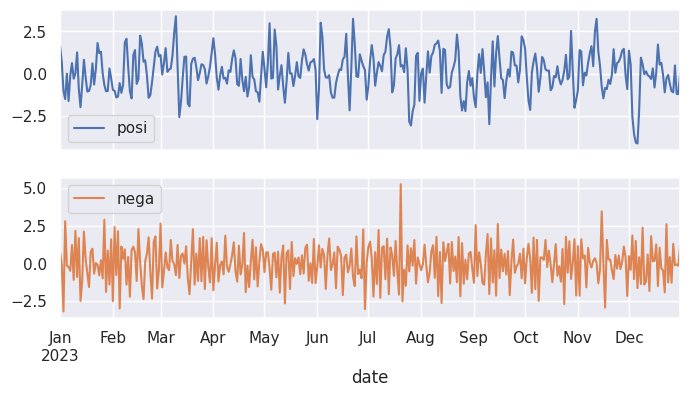

In [ ]:
ma_data = pd.read_csv(
    "4-2-2-ma-data.csv", index_col="date", parse_dates=True, dtype="float"
)

ma_data.index.freq = "D"
ma_data.plot(subplots=True)

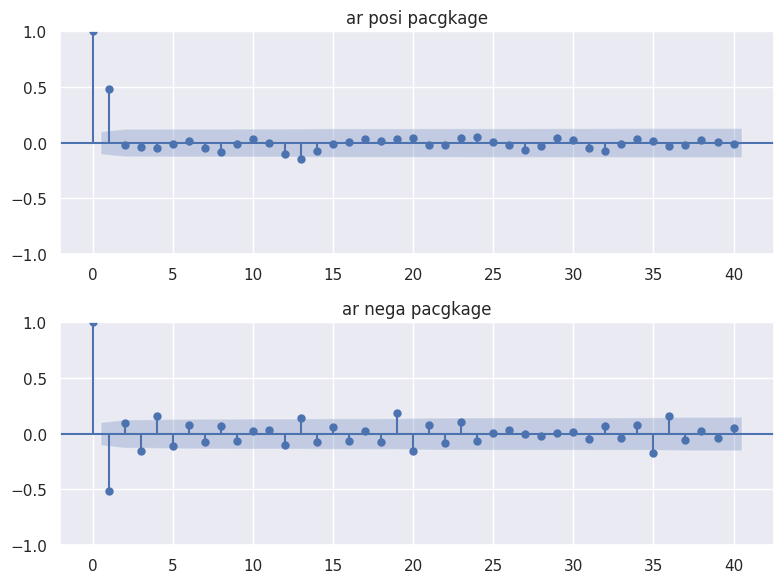

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True)

_ = sm.graphics.tsa.plot_acf(
    ma_data["posi"], lags=40, title="ar posi pacgkage", ax=ax[0]
)
_ = sm.graphics.tsa.plot_acf(
    ma_data["nega"], lags=40, title="ar nega pacgkage", ax=ax[1]
)

In [ ]:
# tsa.lagmatで原系列のラグを取得
ar_lag = tsa.lagmat(
    ar_data["posi"],  # 取得する列を指定
    maxlag=1,  # ラグの最大数
    original="in",  # 原系列を含めるかどうか
    use_pandas=True,  # pandasのDataFrameで返すかどうか
)

print(ar_lag.columns)
# カラム名を変更
ar_lag.columns = ["target", "lag1"]
# 最初の１行を削除
ar_lag = ar_lag.iloc[1:, :]
print(ar_lag.head())


Index(['posi', 'posi.L.1'], dtype='object')
              target      lag1
date                          
2023-01-02  1.867413  1.788628
2023-01-03  1.590428  1.867413
2023-01-04 -0.591151  1.590428
2023-01-05 -0.750309 -0.591151
2023-01-06 -0.955006 -0.750309


In [ ]:
# statsmodelsのols関数で回帰分析を実行
# 定数項cと係数φ1を推定
ar_ols = smf.ols(formula="target ~ lag1", data=ar_lag).fit()
ar_ols.params

Intercept    0.001189
lag1         0.802707
dtype: float64

In [ ]:
ar_autoreg = tsa.AutoReg(ar_data["posi"], lags=1).fit()
ar_autoreg.params

const      0.001189
posi.L1    0.802707
dtype: float64

In [37]:
regressor = LinearRegression()
forecaster = make_reduction(regressor, window_length=1, strategy="recursive")
forecaster.fit(ar_data["posi"])

forecaster.get_fitted_params()

{'estimator': LinearRegression(),
 'transformers': None,
 'window_length': 1,
 'estimator__coef': array([0.80270658]),
 'estimator__intercept': 0.0011885023794679858,
 'estimator__n_features_in': 1,
 'estimator__rank': 1,
 'estimator__singular': array([33.33510614])}

In [ ]:
mod_ar = tsa.SARIMAX(ar_data["posi"], order=(1, 0, 0), trend="c").fit()
mod_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   posi   No. Observations:                  365
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -532.073
Date:                Mon, 29 Dec 2025   AIC                           1070.145
Time:                        08:18:21   BIC                           1081.845
Sample:                    01-01-2023   HQIC                          1074.795
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0098      0.054      0.182      0.856      -0.096       0.115
ar.L1          0.8027      0.031     26.196      0.000       0.743       0.863
sigma2         1.0776      0.080     13.387      0.000       0.920       1.235
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.81   Prob(JB):                         0.99
Heteroskedasticity (H):               1.26   Skew:                            -0.01
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mod_ma = tsa.SARIMAX(ma_data["posi"], order=(0, 0, 1), trend="c").fit()
mod_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   posi   No. Observations:                  365
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -501.281
Date:                Mon, 29 Dec 2025   AIC                           1008.562
Time:                        08:23:52   BIC                           1020.262
Sample:                    01-01-2023   HQIC                          1013.212
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0989      0.089      1.112      0.266      -0.075       0.273
ma.L1          0.7754      0.033     23.154      0.000       0.710       0.841
sigma2         0.9106      0.066     13.755      0.000       0.781       1.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.95   Prob(JB):                         0.96
Heteroskedasticity (H):               1.36   Skew:                             0.00
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
ar_ols.params

Intercept    0.001189
lag1         0.802707
dtype: float64

In [ ]:
ar_pred_1 = (
    ar_ols.params.iloc[0] + ar_ols.params.iloc[1] * ar_data["posi"].tail(1).valuesb
)

print(ar_pred_1)

[-0.2189263]


In [44]:
ar_data["posi"].tail(1)

date
2023-12-31   -0.274216
Freq: D, Name: posi, dtype: float64

In [ ]:
forecaster.predict(fh=np.arange(1, 4))


2024-01-01   -0.218926
2024-01-02   -0.174545
2024-01-03   -0.138920
Freq: D, Name: posi, dtype: float64

/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 35251 (\N{CJK UNIFIED IDEOGRAPH-89B3}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35251 (\N{CJK UNIFIED IDEOGRAPH-89B3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtool

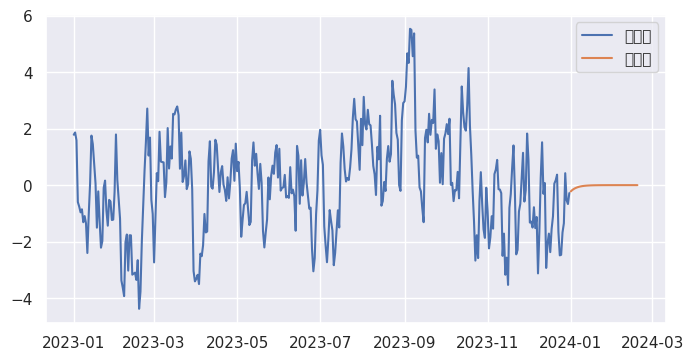

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(ar_data["posi"], label="観測値")

ax.plot(ar_autoreg.forecast(50), label="予測値", color="C1")

ax.legend()

In [49]:
mod_ma.params


intercept    0.098855
ma.L1        0.775439
sigma2       0.910584
dtype: float64

In [50]:
print(mod_ma.fittedvalues.tail(1))

date
2023-12-31    0.275119
Freq: D, dtype: float64


In [54]:
mod_ma.forecast(3)

2024-01-01   -0.079155
2024-01-02    0.098855
2024-01-03    0.098855
Freq: D, Name: predicted_mean, dtype: float64

<Axes: xlabel='date'>

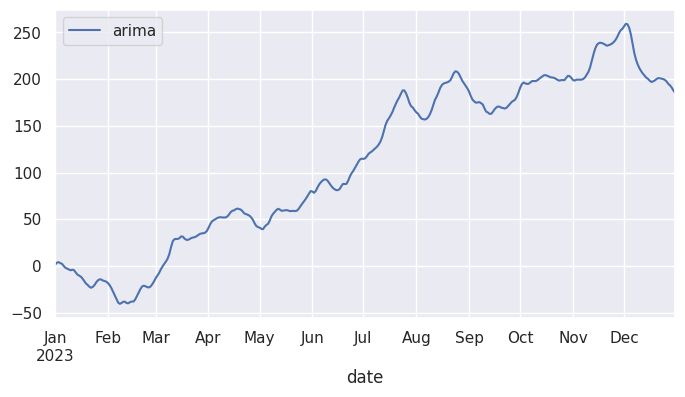

In [ ]:
arima_data = pd.read_csv(
    "4-2-3-arima-data.csv", index_col="date", parse_dates=True, dtype="float"
)
arima_data.index.freq = "D"
arima_data.plot()

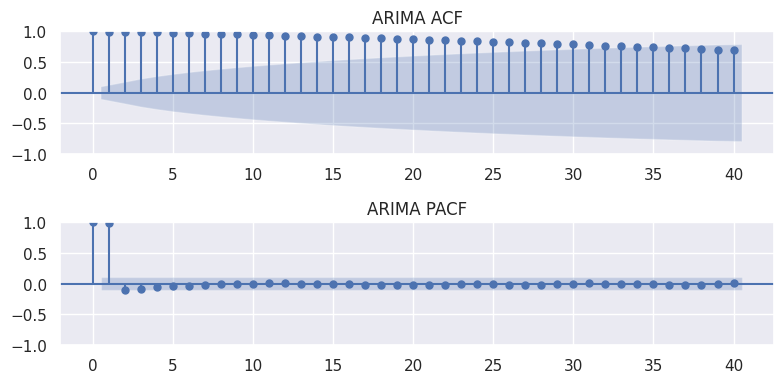

In [ ]:
# グラフサイズの指定
fig, ax = plt.subplots(2, 1, figsize=(8, 4), tight_layout=True)

# コレログラムの作成
_ = sm.graphics.tsa.plot_acf(arima_data, lags=40, title="ARIMA ACF", ax=ax[0])
_ = sm.graphics.tsa.plot_pacf(arima_data, lags=40, title="ARIMA PACF", ax=ax[1])

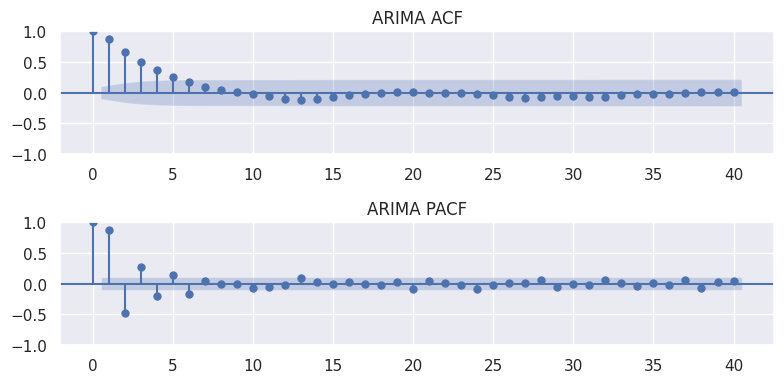

In [ ]:
arma_data = arima_data.diff().iloc[1:, :]
fig, ax = plt.subplots(2, 1, figsize=(8, 4), tight_layout=True)

# コレログラムの作成
_ = sm.graphics.tsa.plot_acf(arma_data, lags=40, title="ARIMA ACF", ax=ax[0])
_ = sm.graphics.tsa.plot_pacf(arma_data, lags=40, title="ARIMA PACF", ax=ax[1])

In [ ]:
mod_arima = tsa.SARIMAX(arima_data, order=(1, 1, 1), trend="c").fit()
mod_arima.params

intercept    0.110056
ar.L1        0.772905
ma.L1        0.788230
sigma2       0.905733
dtype: float64

/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 35251 (\N{CJK UNIFIED IDEOGRAPH-89B3}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35251 (\N{CJK UNIFIED IDEOGRAPH-89B3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtool

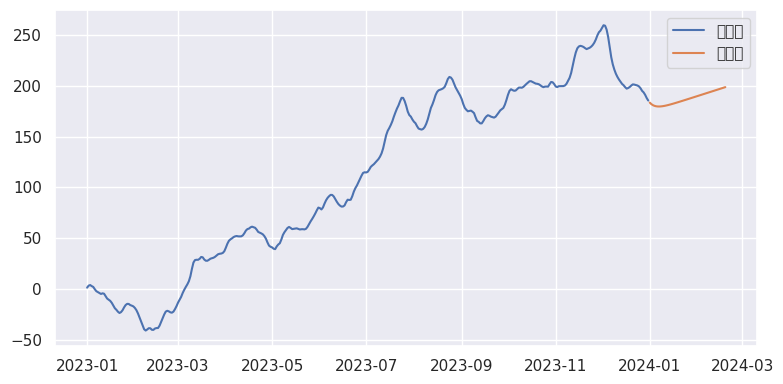

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True)
ax.plot(arima_data, label="観測値")
ax.plot(mod_arima.forecast(50), label="予測値", color="C1")
ax.legend()

<Axes: xlabel='date'>

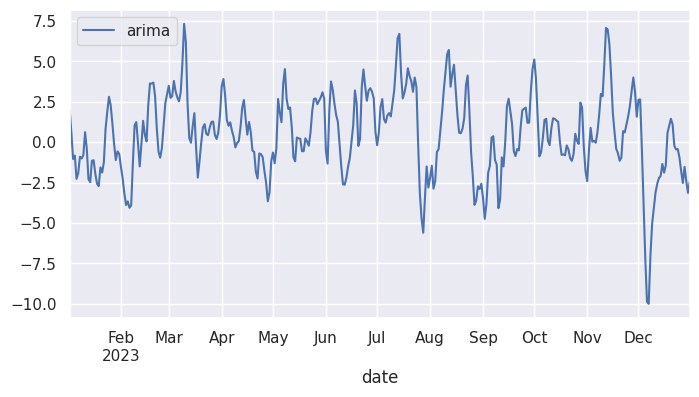

In [67]:
arima_data.diff().iloc[1:, :].plot()

In [ ]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import seaborn as sns

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
from scipy import stats

sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# グラフの日本語表記
from matplotlib import rcParams

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = "Meiryo"

In [ ]:
# 表示設定
np.set_printoptions(linewidth=60)
pd.set_option("display.width", 80)

from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 8, 4


In [71]:
# 乱数の種
np.random.seed(1)

# 正規分布(平均0,分散1)に従う乱数100個の累積和を作成し、ランダムウォーク系列を作る
sim_size = 100
rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=sim_size))
rw

array([ 1.62434536,  1.01258895,  0.4844172 , -0.58855142,
        0.2768562 , -2.02468249, -0.27987073, -1.04107763,
       -0.72203853, -0.97140891,  0.49069903, -1.56944168,
       -1.89185888, -2.27591324, -1.1421438 , -2.24203506,
       -2.41446327, -3.29232169, -3.25010794, -2.66729273,
       -3.76791191, -2.6231882 , -1.72159748, -1.21910314,
       -0.31824719, -1.00197505, -1.12486527, -2.06063471,
       -2.32852279, -1.79816732, -2.48982807, -2.8865816 ,
       -3.5737543 , -4.41895994, -5.09020607, -5.10287067,
       -6.22018102, -5.98576532, -4.32596314, -3.58391898,
       -3.77575454, -4.6633835 , -5.41054179, -3.71808719,
       -3.66727944, -4.30427508, -4.1133596 , -2.01310446,
       -1.89294551, -1.2757424 , -0.97557208, -1.32782193,
       -2.47034012, -2.81968285, -3.02857708, -2.44195389,
       -1.60297048, -0.67186839, -0.38628107,  0.4988601 ,
       -0.25553785,  0.99733031,  1.51026013,  1.21216729,
        1.70068544,  1.62511373,  2.75674312,  4.2765599

In [ ]:
# 乱数の種
np.random.seed(1)

# 正規分布(平均0,分散1)に従う乱数100個の累積和を作成し、ランダムウォーク系列を作る
sim_size = 100
rw = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=sim_size))
rw
# 4日前の値を参照する、季節性ランダムウォーク系列を作る
sim_size = 100
srw = np.zeros(sim_size)
np.put(srw, [0, 1, 2, 3], stats.norm.rvs(loc=0, scale=1, size=4))

for i in range(4, sim_size):
    print(i)
    np.put(srw, i, srw[i - 4] + stats.norm.rvs(loc=0, scale=1, size=1))
    print(srw)

4
[ 1.62434536 -0.61175641 -0.52817175 -1.07296862
  2.48975299  0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.          0.          0.          0.
  0.  

array([<Axes: >, <Axes: >], dtype=object)

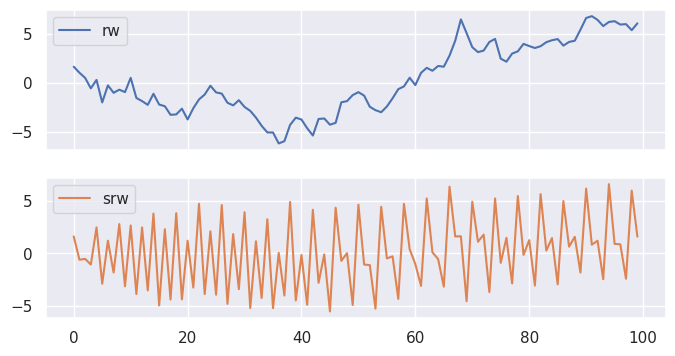

In [ ]:
rw_df = pd.DataFrame({"rw": rw, "srw": srw})
rw_df.plot(subplots=True)


array([<Axes: >, <Axes: >], dtype=object)

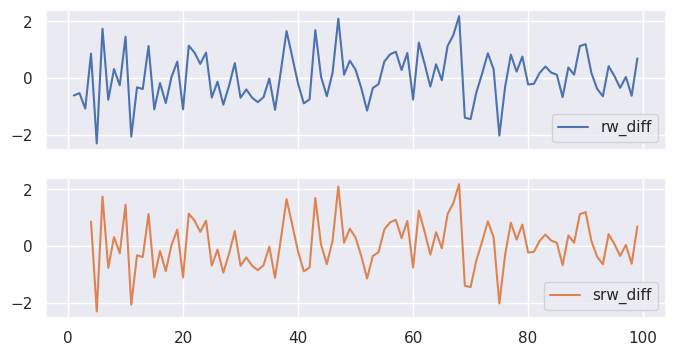

In [79]:
rw_df["rw_diff"] = rw_df["rw"].diff(1)
rw_df["srw_diff"] = rw_df["srw"].diff(4)
rw_df[["rw_diff", "srw_diff"]].plot(subplots=True)


In [ ]:
air_passengers = sm.datasets.get_rdataset("AirPassengers").data

air_passengers.index = pd.date_range(
    start="1949-01-01", periods=len(air_passengers), freq="MS"
)

air_passengers = air_passengers.drop(air_passengers.columns[0], axis=1)

train = air_passengers.loc["1949-01":"1957-12"]
test = air_passengers.loc["1958-01":"1960-12"]


In [ ]:
mod_sarima = tsa.SARIMAX(
    train, order=(3, 1, 2), seasonal_order=(1, 1, 1, 12), trend="c"
).fit(maxiter=1000)
print(mod_sarima.params)

intercept     0.108186
ar.L1         0.514948
ar.L2         0.317987
ar.L3        -0.151500
ma.L1        -0.833772
ma.L2        -0.166111
ar.S.L12     -0.175706
ma.S.L12      0.029132
sigma2       79.217822
dtype: float64


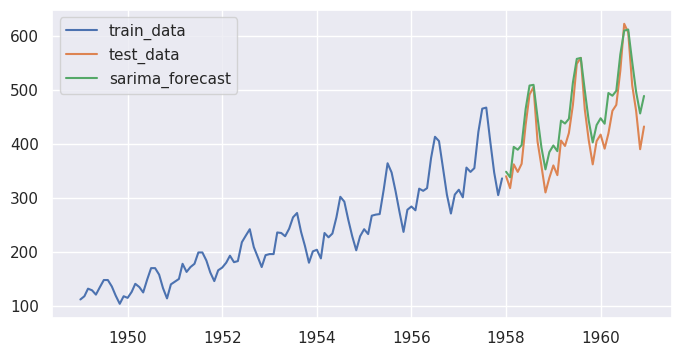

In [ ]:
pred_sarima = mod_sarima.forecast(36)
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(train["value"], label="train_data")
ax.plot(test["value"], label="test_data")
ax.plot(pred_sarima, label="sarima_forecast")
ax.legend()

In [ ]:
ts_sales_bj = pd.read_csv(
    "4-3-1-sales-data.csv", index_col="date", parse_dates=True, dtype="float"
)
ts_sales_bj.head()


,sales,discount
date,,
2010-01-01,71.0,0.0
2010-02-01,67.0,0.0
2010-03-01,64.0,0.0
2010-04-01,64.0,0.0
2010-05-01,151.0,1.0


In [ ]:
ts_sales_bj.index.freq = "MS"
print(ts_sales_bj.head(3))

            sales  discount
date                       
2010-01-01   71.0       0.0
2010-02-01   67.0       0.0
2010-03-01   64.0       0.0


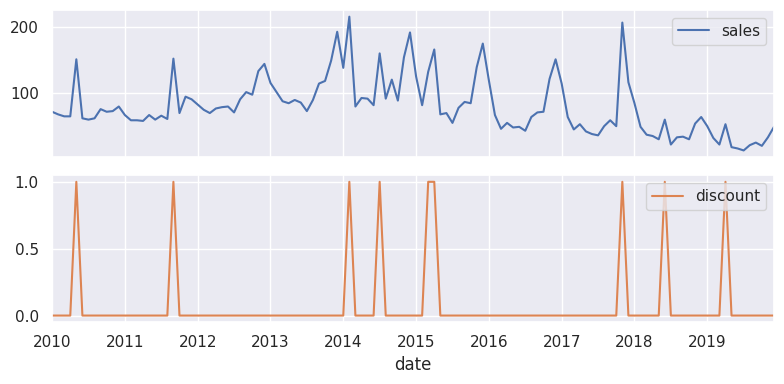

In [107]:
ts_sales_bj.plot(subplots=True)
plt.tight_layout()

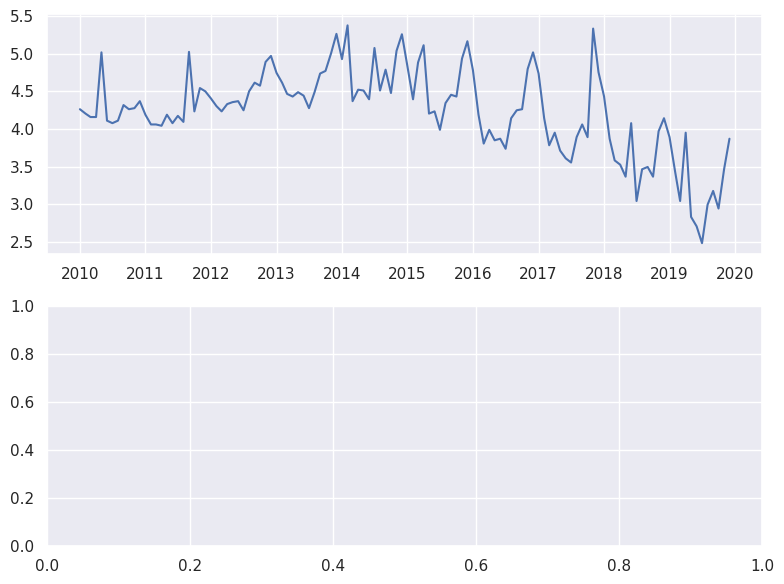

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), tight_layout=True)
ax[0].plot(np.log(ts_sales_bj["sales"]))

In [ ]:
# 訓練データとテストデータに分割する
train = ts_sales_bj.loc["2010-01":"2018-12"]
test = ts_sales_bj.loc["2019-01":"2019-12"]
mod_sarimax = tsa.SARIMAX(
    np.log(train["sales"]),
    exog=train["discount"],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
).fit(maxiter=5000, method="nm")

print(mod_sarimax.params)


Optimization terminated successfully.
         Current function value: -0.725494
         Iterations: 406
         Function evaluations: 634
discount    0.780721
ar.L1      -0.289926
ma.L1      -0.164008
ar.S.L12   -0.017217
ma.S.L12   -0.042015
sigma2      0.011220
dtype: float64


/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph

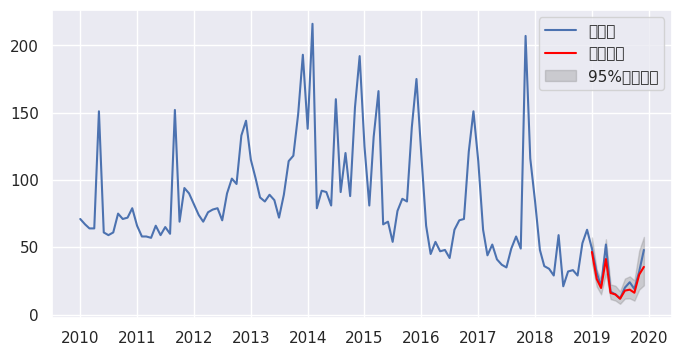

In [ ]:
# 信頼区間もあわせて計算
# forecast関数の代わりにget_forecast関数を使う
pred_ci = mod_sarimax.get_forecast(
    steps=12,
    exog=test["discount"].values.reshape(-1, 1),  # 外生変数
)
#  対数変換していたのを、元に戻した
conf_int_df_exp = pred_ci.summary_frame(alpha=0.05).apply(np.exp)

# グラフサイズの指定
fig, ax = plt.subplots(figsize=(8, 4))

# 元データの図示
ax.plot(ts_sales_bj["sales"], label="原系列")

# 予測結果の図示
# 点予測値
ax.plot(conf_int_df_exp["mean"], color="red", label="点予測値")

# 信頼区間
ax.fill_between(
    test.index,  # 横軸(時間軸)
    conf_int_df_exp["mean_ci_lower"],  # 下限値
    conf_int_df_exp["mean_ci_upper"],  # 上限値
    alpha=0.3,  # 透過度
    color="gray",  # 灰色にする
    label="95%信頼区間",
)

# 凡例
ax.legend()


In [ ]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import seaborn as sns

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
from scipy import stats

sns.set()

# 統計モデルを推定するライブラリ
import pmdarima as pm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as tsa

# グラフの日本語表記
from matplotlib import rcParams

# 予測

# 予測の評価指標

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = "Meiryo"

In [ ]:
# 残差の取得
ols_resid = smf.ols("np.log(sales) ~ discount", data=train).fit().resid
# 確認
ols_resid.head(3)

date
2010-01-01   -0.025589
2010-02-01   -0.083576
2010-03-01   -0.129386
Freq: MS, dtype: float64

In [ ]:
pm.arima.ndiffs(ols_resid, test="kpss")

1

In [ ]:
pm.arima.nsdiffs(ols_resid, m=12, test="ocsb")

1

In [ ]:
mod_sarimax_best = pm.arima.auto_arima(
    y=np.log(train["sales"]),  # データ
    X=train["discount"].values.reshape(-1, 1),  # 外生変数
    test="kpss",  # KPSS検定で、差分をとる階数を決める
    seasonal_test="ocsb",  # OCSB検定で、季節差分をとる階数を決める
    criterion="AIC",  # AICで変数選択
    m=12,  # 周期は12
    max_p=2,
    max_q=2,
    max_P=2,
    max_Q=2,  # 最大次数
    start_p=0,
    start_q=0,
    start_Q=0,
    start_P=0,  # 開始次数
    stepwise=False,  # 総当たりでAICを比較
    n_jobs=-1,  # 使える限りのコアを使って並列化
    maxiter=5000,  # パラメータ推定のときの設定(反復回数を5000回に増やす)
    with_intercept=False,  # 切片なしのモデルにする
    solver="nm",  # パラメータ推定のときの設定(最適化の手法を変更)
)
print(mod_sarimax_best.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                  77.949
Date:                            Wed, 31 Dec 2025   AIC                           -149.898
Time:                                    07:02:36   BIC                           -142.236
Sample:                                01-01-2010   HQIC                          -146.802
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7762      0.023     33.213      0.000       0.730       0.822
ar.L1         -0.4453      0.087   

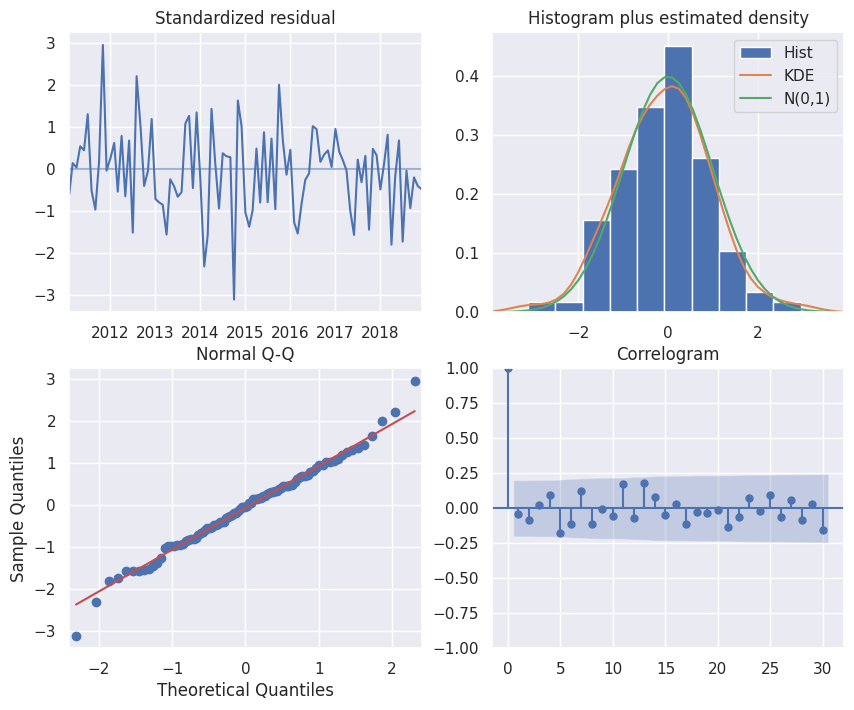

In [ ]:
_ = mod_sarimax_best.plot_diagnostics(lags=30, figsize=(10, 8))

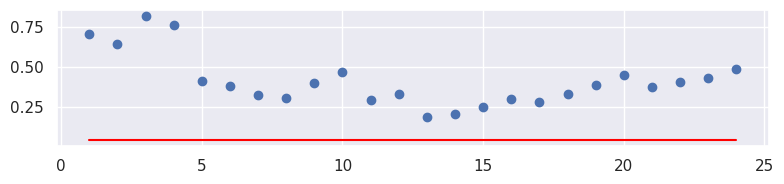

In [ ]:
# 残差の自己相関の検定
# 1時点前から24時点前まで、1つずつ最大次数をずらして、24回検定を行う
res_test = mod_sarimax_best.arima_res_.test_serial_correlation(
    method="ljungbox", lags=24
)

# グラフサイズの指定
fig, ax = plt.subplots(figsize=(8, 2), tight_layout=True)

# p値のグラフを描画
ax.scatter(np.arange(1, 25), res_test[0][1])

# 高さ0.05の位置に赤線を引く
ax.plot(np.arange(1, 25), np.tile(0.05, 24), color="red")

2019-01-01    46.116489
2019-02-01    26.225729
2019-03-01    19.711509
2019-04-01    40.420323
2019-05-01    15.870309
2019-06-01    14.853851
2019-07-01    11.491086
2019-08-01    17.509569
2019-09-01    18.057045
2019-10-01    15.868194
2019-11-01    29.000589
2019-12-01    34.472347
Freq: MS, dtype: float64


/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.pri

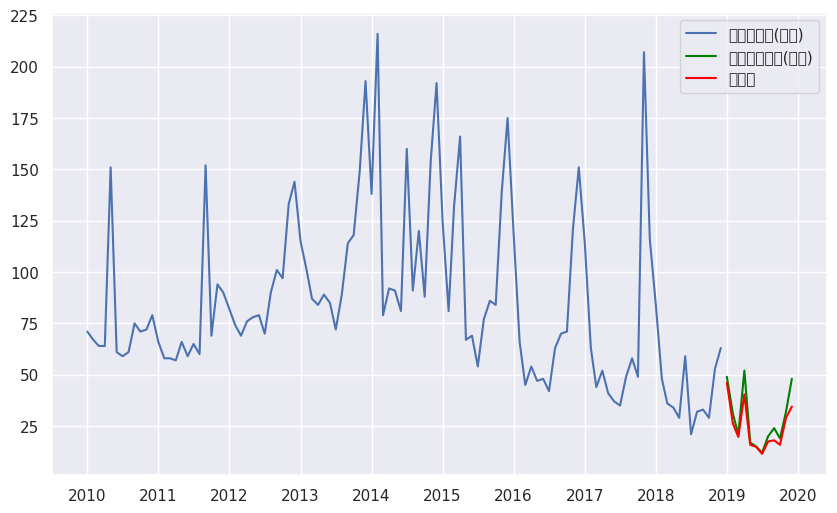

In [ ]:
# 1. 予測期間の長さを決める（例：テストデータの行数分）
n_periods = len(test)

# 2. 予測を実行する
# 注意: 学習時に「discount」を使ったので、予測時にも「将来のdiscount」を渡す必要があります
forecast_log = mod_sarimax_best.predict(
    n_periods=n_periods,
    X=test["discount"].values.reshape(-1, 1),  # ここに「未来の値引き計画」を入れる
)

# 3. 対数を元の金額に戻す（np.exp）
# 学習時に np.log() をしているので、戻さないと値が小さすぎます
forecast_real = np.exp(forecast_log)

# --- 結果の確認 ---
print(forecast_real)

# --- グラフで可視化 ---
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# 実績値（学習データ）
ax.plot(train.index, train["sales"], label="学習データ(実測)")

# テストデータ（正解があれば）
ax.plot(test.index, test["sales"], label="テストデータ(正解)", color="green")

# 予測値
ax.plot(test.index, forecast_real, label="予測値", color="red")

ax.legend()
plt.show()

In [ ]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import seaborn as sns

# グラフを描画するライブラリ
from matplotlib import pylab as plt
from scipy import stats

sns.set()

In [ ]:
np.random.seed(1)

sim_size = 100
mu = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=sim_size).round(1)) + 30
y = mu + stats.norm.rvs(loc=0, scale=5, size=sim_size).round(1)

local_level_df = pd.DataFrame({"y": y, "mu": mu})
print(local_level_df.head())

      y    mu
0  29.4  31.6
1  37.1  31.0
2  32.5  30.5
3  32.4  29.4
4  24.8  30.3


<Axes: >

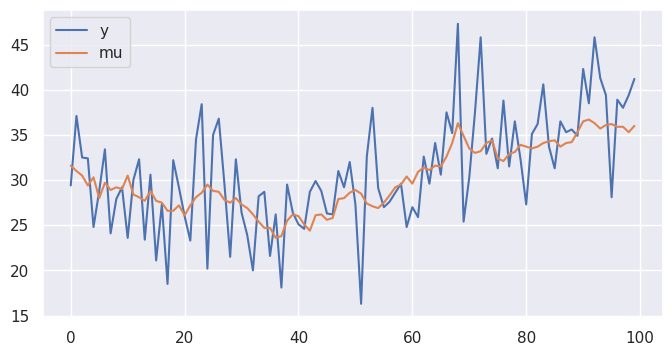

In [134]:
local_level_df.plot()

In [ ]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import seaborn as sns

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# グラフを描画するライブラリ
from matplotlib import pylab as plt
from scipy import stats
from scipy.optimize import minimize

sns.set()

In [ ]:
np.random.seed(1)

sim_size = 100
mu = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=sim_size).round(1)) + 30

y = mu + stats.norm.rvs(loc=0, scale=5, size=sim_size).round(1)

y_ts = pd.Series(y, index=pd.date_range(start="2020-01-01", periods=sim_size, freq="D"))
y_ts

2020-01-01    29.4
2020-01-02    37.1
2020-01-03    32.5
2020-01-04    32.4
2020-01-05    24.8
              ... 
2020-04-05    28.1
2020-04-06    38.9
2020-04-07    38.0
2020-04-08    39.4
2020-04-09    41.2
Freq: D, Length: 100, dtype: float64

In [ ]:
class LocalLevel:
    # データを格納(pd.Seriesで、日付インデックスがついている想定)
    def __init__(self, ts_data):
        self.ts_data = ts_data
        self.a = pd.Series(np.zeros(len(ts_data)), index=ts_data.index)
        self.P = pd.Series(np.zeros(len(ts_data)), index=ts_data.index)
        self.v = pd.Series(np.zeros(len(ts_data)), index=ts_data.index)
        self.F = pd.Series(np.zeros(len(ts_data)), index=ts_data.index)
        self.K = pd.Series(np.zeros(len(ts_data)), index=ts_data.index)
        self.s_level = None  # 過程誤差の分散
        self.s_irregular = None  # 観測誤差の分散

    # 状態の初期値を設定する
    def initialize(self, initial_a, initial_P):
        self.initial_a = initial_a
        self.initial_P = initial_P

    # 1時点先の予測値を計算する
    def _forecast_step(self, a_pre, P_pre, s_irregular, s_level, first=False):
        if first:
            a_forecast = self.initial_a  # 初回に限り、初期値を代入
            P_forecast = self.initial_P  # 初回に限り、初期値を代入
        else:
            a_forecast = a_pre  # 状態の予測値
            P_forecast = P_pre + s_level  # 状態の予測値の分散

        y_forecast = a_forecast  # 観測値の予測値
        F = P_forecast + s_irregular  # 観測値の予測値の残差の分散

        return pd.Series(
            [a_forecast, P_forecast, y_forecast, F], index=["a", "P", "y", "F"]
        )

    # 1時点のフィルタリングをする
    def _filter_step(self, forecasted, y, s_irregular):
        v = y - forecasted.y  # 観測値の1時点先予測値の残差
        K = forecasted.P / forecasted.F  # カルマンゲイン
        a_filter = forecasted.a + K * v  # フィルタ化推定量
        P_filter = (1 - K) * forecasted.P  # フィルタ化推定量の分散

        return pd.Series([a_filter, P_filter, v, K], index=["a", "P", "v", "K"])

    # フィルタリングを行う
    def filter(self, s_irregular, s_level):
        for i in range(0, len(self.ts_data)):
            if i == 0:
                # 初回のみ、初期値の値を利用して予測する
                forecast_loop = self._forecast_step(
                    a_pre=None,
                    P_pre=None,
                    s_irregular=s_irregular,
                    s_level=s_level,
                    first=True,
                )
            else:
                # 2時点目以降は、1時点前の値を参照して予測する
                forecast_loop = self._forecast_step(
                    a_pre=self.a.iloc[i - 1],
                    P_pre=self.P.iloc[i - 1],
                    s_irregular=s_irregular,
                    s_level=s_level,
                )

            # フィルタリングの実行
            filter_loop = self._filter_step(
                forecasted=forecast_loop,
                y=self.ts_data.iloc[i],
                s_irregular=s_irregular,
            )

            # 結果の保存
            self.a.iloc[i] = filter_loop.a
            self.P.iloc[i] = filter_loop.P
            self.F.iloc[i] = forecast_loop.F
            self.K.iloc[i] = filter_loop.K
            self.v.iloc[i] = filter_loop.v

    # 対数尤度の計算
    def llf(self):
        return np.sum(np.log(stats.norm.pdf(x=self.v, loc=0, scale=np.sqrt(self.F))))

    # パラメータの推定と状態の再当てはめ
    def fit(self, start_params):
        # パラメータを指定して対数尤度の-1倍を出力する内部関数
        def calc_llf(params):
            self.filter(np.exp(params[0]), np.exp(params[1]))
            return self.llf() * -1

        # 最適化の実行
        opt_res = minimize(
            calc_llf,
            start_params,
            method="Nelder-Mead",
            tol=1e-6,
            options={"maxiter": 2000},
        )

        # パラメータの保存
        self.s_irregular = np.exp(opt_res.x[0])
        self.s_level = np.exp(opt_res.x[1])

        # 最適なパラメータでもう一度フィルタリングを行う
        self.filter(self.s_irregular, self.s_level)

    # 推定された状態の可視化
    def plot_level(self):
        plot_df = pd.concat([self.a, self.ts_data], axis=1)
        plot_df.columns = column = ["filtered", "y"]
        plot_df.plot()

In [142]:
# データを格納
local_level = LocalLevel(y_ts)

# 初期化
local_level.initialize(initial_a=0, initial_P=1000000)

# フィルタリング
local_level.filter(s_irregular=10, s_level=1)

In [143]:
local_level.a.round(5).head()

2020-01-01    29.39971
2020-01-02    33.43318
2020-01-03    33.07468
2020-01-04    32.85459
2020-01-05    30.44751
Freq: D, dtype: float64

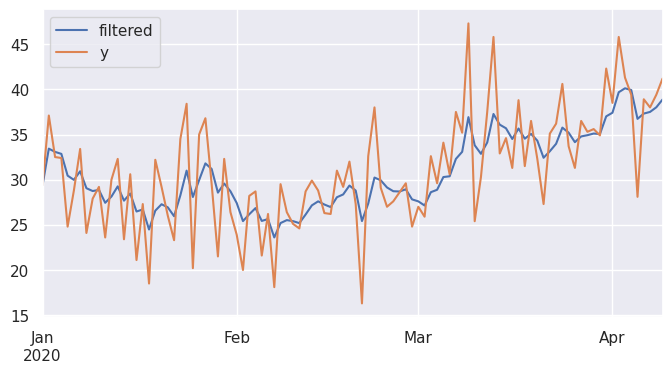

In [145]:
local_level.plot_level()

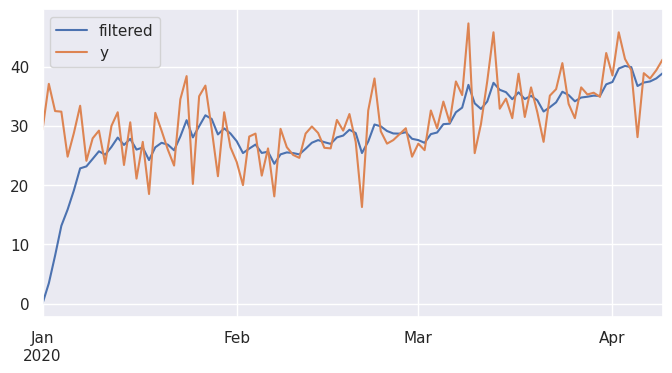

In [146]:
# 初期化
local_level.initialize(initial_a=0, initial_P=0.01)

# フィルタリング
local_level.filter(s_irregular=10, s_level=1)

local_level.plot_level()

In [ ]:
# ローカルレベルモデルの推定

# データの格納とモデルの特定
mod_local_level = tsa.UnobservedComponents(
    y_ts, level="local level", loglikelihood_burn=0
)

# 初期化
mod_local_level.initialize_approximate_diffuse(1000000)

# フィルタリングと最尤法によるパラメータの推定
res_local_level = mod_local_level.fit(start_params=[1, 1], method="nm", maxiter=2000)

# 結果の出力
print(res_local_level.summary())

Optimization terminated successfully.
         Current function value: 3.117134
         Iterations: 48
         Function evaluations: 92
                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                  100
Model:                    local level   Log Likelihood                -311.713
Date:                Sat, 03 Jan 2026   AIC                            627.427
Time:                        02:19:22   BIC                            632.637
Sample:                    01-01-2020   HQIC                           629.535
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    22.4973      3.659      6.149      0.000

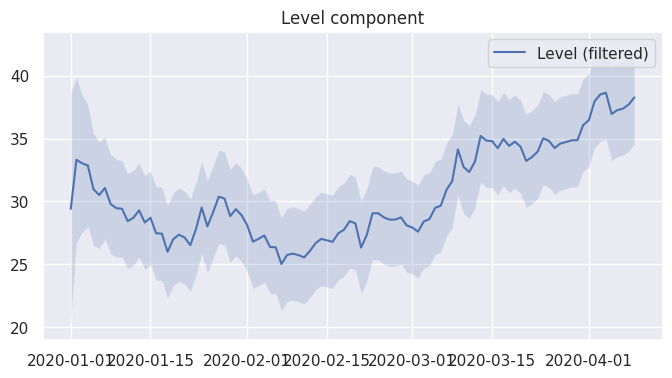

In [153]:
# フィルタ化推定量の描画
_ = res_local_level.plot_components(which="filtered", observed=False)

In [ ]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import seaborn as sns

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# グラフを描画するライブラリ
from matplotlib import pylab as plt
from scipy import stats

sns.set()

# グラフの日本語表記
from matplotlib import rcParams

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = "Meiryo"

In [155]:
# 乱数の種
np.random.seed(1)

# 正規分布に従う乱数の累積和を作成し、ランダムウォーク系列を作る
sim_size = 100
mu_cumsum = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=sim_size))

In [174]:
# 乱数の種
np.random.seed(1)

# 正規分布に従う乱数の累積和を作成し、ランダムウォーク系列を作る
sim_size = 100
mu_for = np.zeros(sim_size)
mu_for[0] = stats.norm.rvs(loc=0, scale=1, size=1)[0]

for t in range(1, sim_size):
    mu_for[t] = mu_for[t - 1] + stats.norm.rvs(loc=0, scale=1, size=1)[0]

In [176]:
np.random.seed(1)

delta = np.zeros(sim_size)
delta[0] = stats.norm.rvs(loc=0, scale=0.5, size=1)[0]

mu_smooth = np.zeros(sim_size)
mu_smooth

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

<Axes: >

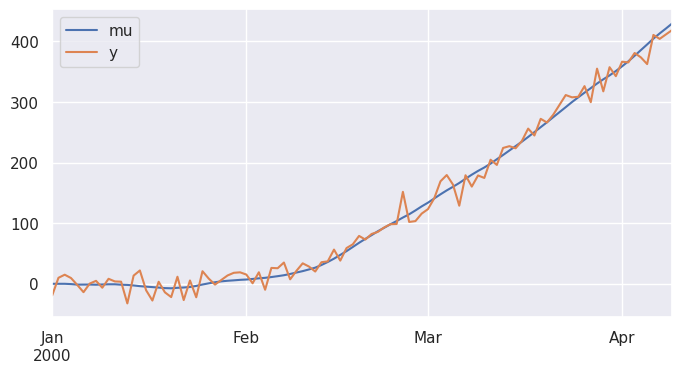

In [ ]:
for t in range(2, sim_size):
    delta[t] = delta[t - 1] + stats.norm.rvs(loc=0, scale=0.5, size=1)[0]
    mu_smooth[t] = mu_smooth[t - 1] + delta[t - 1]

y_smooth = mu_smooth + stats.norm.rvs(loc=0, scale=15, size=sim_size)

smooth_df = pd.DataFrame(
    {"delta": delta, "mu": mu_smooth, "y": y_smooth},
    index=pd.date_range(start="2000-01-01", periods=sim_size, freq="D"),
)
smooth_df[["mu", "y"]].plot()


In [ ]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import seaborn as sns

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# グラフを描画するライブラリ
from matplotlib import pylab as plt
from scipy import stats

sns.set()

# 動的なグラフを描画するライブラリ

# sktimeで状態空間モデルを推定する

# グラフの日本語表記
from matplotlib import rcParams

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = "Meiryo"

# 表示設定
np.set_printoptions(linewidth=60)
pd.set_option("display.width", 80)

from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 8, 4

In [ ]:
sales_day = pd.read_csv(
    "5-6-1-daily-sales-data.csv", index_col="date", parse_dates=True, dtype="float"
)

sales_day.index.freq = "D"

print(sales_day.head(3))
print(sales_day.tail(3))


                 sales  flyer
date                         
2000-01-01  462.387217    0.0
2000-01-02  363.262237    0.0
2000-01-03  356.648654    0.0
                 sales  flyer
date                         
2001-06-27  243.739643    0.0
2001-06-28  205.223214    0.0
2001-06-29  192.051090    0.0


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>],
      dtype=object)

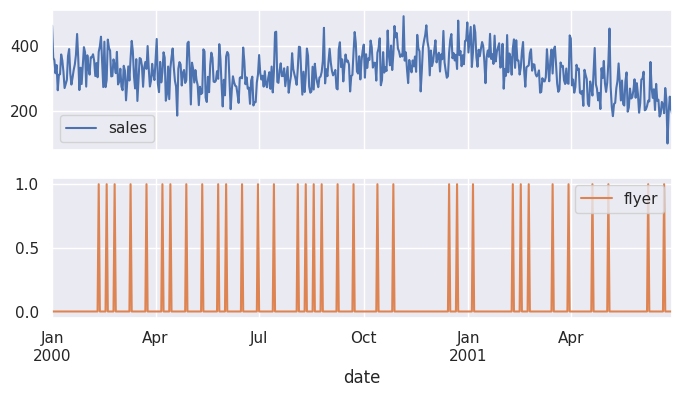

In [ ]:
sales_day.plot(subplots=True)

In [ ]:
import pandas as pd

df = pd.read_csv("メインデータ_2025.csv")
df.groupby(["PI_01_B00004579", "PI_02_B00004579"])["SEX_CD"].count()

PI_01_B00004579  PI_02_B00004579
                                     78
                 1                    5
                 2                   12
                 3                   47
                 4                   32
1                                     7
                 1                   36
                 2                   19
                 3                    3
                 4                    1
2                                    14
                 1                   20
                 2                   92
                 3                   50
                 4                   10
3                                   107
                 1                    4
                 2                   54
                 3                  785
                 4                  173
4                                    86
                 1                    1
                 2                   11
                 3                  162
       

In [ ]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import seaborn as sns

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# グラフを描画するライブラリ
from matplotlib import pylab as plt
from scipy import stats

sns.set()

In [ ]:
# 表示設定
np.set_printoptions(linewidth=60)
pd.set_option("display.width", 80)

from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 8, 4

In [ ]:
# 乱数の種
np.random.seed(1)

# 正規分布に従う乱数の累積和を作成し、ランダムウォーク系列を作る
sim_size = 100
mu = np.cumsum(stats.norm.rvs(loc=0, scale=1, size=sim_size).round(1)) + 30
print(mu)
# 観測値の作成
y = mu + stats.norm.rvs(loc=0, scale=5, size=sim_size).round(1)
print("=" * 100)
print(y)
# 時系列インデックスの付与
y_ts = pd.Series(y, index=pd.date_range(start="2020-01-01", periods=sim_size, freq="D"))

[31.6 31.  30.5 29.4 30.3 28.  29.7 28.9 29.2 29.  30.5
 28.4 28.1 27.7 28.8 27.7 27.5 26.6 26.6 27.2 26.1 27.2
 28.1 28.6 29.5 28.8 28.7 27.8 27.5 28.  27.3 26.9 26.2
 25.4 24.7 24.7 23.6 23.8 25.5 26.2 26.  25.1 24.4 26.1
 26.2 25.6 25.8 27.9 28.  28.6 28.9 28.5 27.4 27.1 26.9
 27.5 28.3 29.2 29.5 30.4 29.6 30.9 31.4 31.1 31.6 31.5
 32.6 34.1 36.3 34.9 33.5 33.  33.2 34.1 34.4 32.4 32.1
 32.9 33.1 33.9 33.7 33.5 33.7 34.1 34.3 34.4 33.7 34.1
 34.2 35.3 36.5 36.7 36.3 35.7 36.1 36.2 35.9 35.9 35.3
 36. ]
[29.4 37.1 32.5 32.4 24.8 28.8 33.4 24.1 27.9 29.2 23.6
 30.  32.3 23.4 30.6 21.1 27.3 18.5 32.2 29.2 26.  23.3
 34.5 38.4 20.2 35.  36.8 29.5 21.5 32.3 26.4 23.9 20.
 28.2 28.7 21.6 26.2 18.1 29.5 26.4 25.1 24.6 28.7 29.9
 28.8 26.3 26.2 31.  29.2 32.  27.3 16.3 32.6 38.  29.1
 27.  27.6 28.6 29.6 24.8 27.  25.9 32.6 29.6 34.1 30.6
 37.5 35.2 47.3 25.4 30.3 37.5 45.8 32.9 34.6 31.3 38.8
 31.5 36.5 32.3 27.3 35.1 36.2 40.6 33.7 31.3 36.5 35.3
 35.6 34.9 42.3 38.5 45.8 41.3 39.4 28.1 3

In [ ]:
class LocalLevel:
    # データを格納(pd.Seriesで、日付インデックスがついている想定)
    def __init__(self, ts_data):
        self.ts_data = ts_data
        self.a = pd.Series(np.zeros(len(ts_data)), index=ts_data.index)
        self.P = pd.Series(np.zeros(len(ts_data)), index=ts_data.index)
        self.v = pd.Series(np.zeros(len(ts_data)), index=ts_data.index)
        self.F = pd.Series(np.zeros(len(ts_data)), index=ts_data.index)
        self.K = pd.Series(np.zeros(len(ts_data)), index=ts_data.index)
        self.s_level = None  # 過程誤差の分散
        self.s_irregular = None  # 観測誤差の分散

    # 状態の初期値を設定する
    def initialize(self, initial_a, initial_P):
        self.initial_a = initial_a
        self.initial_P = initial_P

    # 1時点先の予測値を計算する
    def _forecast_step(self, a_pre, P_pre, s_irregular, s_level, first=False):
        if first:
            a_forecast = self.initial_a  # 初回に限り、初期値を代入
            P_forecast = self.initial_P  # 初回に限り、初期値を代入
        else:
            a_forecast = a_pre  # 状態の予測値
            P_forecast = P_pre + s_level  # 状態の予測値の分散

        y_forecast = a_forecast  # 観測値の予測値
        F = P_forecast + s_irregular  # 観測値の予測値の残差の分散

        return pd.Series(
            [a_forecast, P_forecast, y_forecast, F], index=["a", "P", "y", "F"]
        )

    # 1時点のフィルタリングをする
    def _filter_step(self, forecasted, y, s_irregular):
        v = y - forecasted.y  # 観測値の1時点先予測値の残差
        K = forecasted.P / forecasted.F  # カルマンゲイン
        a_filter = forecasted.a + K * v  # フィルタ化推定量
        P_filter = (1 - K) * forecasted.P  # フィルタ化推定量の分散

        return pd.Series([a_filter, P_filter, v, K], index=["a", "P", "v", "K"])

    # フィルタリングを行う
    def filter(self, s_irregular, s_level):
        for i in range(0, len(self.ts_data)):
            if i == 0:
                # 初回のみ、初期値の値を利用して予測する
                forecast_loop = self._forecast_step(
                    a_pre=None,
                    P_pre=None,
                    s_irregular=s_irregular,
                    s_level=s_level,
                    first=True,
                )
            else:
                # 2時点目以降は、1時点前の値を参照して予測する
                forecast_loop = self._forecast_step(
                    a_pre=self.a.iloc[i - 1],
                    P_pre=self.P.iloc[i - 1],
                    s_irregular=s_irregular,
                    s_level=s_level,
                )

            # フィルタリングの実行
            filter_loop = self._filter_step(
                forecasted=forecast_loop,
                y=self.ts_data.iloc[i],
                s_irregular=s_irregular,
            )

            # 結果の保存
            self.a.iloc[i] = filter_loop.a
            self.P.iloc[i] = filter_loop.P
            self.F.iloc[i] = forecast_loop.F
            self.K.iloc[i] = filter_loop.K
            self.v.iloc[i] = filter_loop.v

    # 対数尤度の計算
    def llf(self):
        return np.sum(np.log(stats.norm.pdf(x=self.v, loc=0, scale=np.sqrt(self.F))))

    # パラメータの推定と状態の再当てはめ
    def fit(self, start_params):
        # パラメータを指定して対数尤度の-1倍を出力する内部関数
        def calc_llf(params):
            self.filter(np.exp(params[0]), np.exp(params[1]))
            return self.llf() * -1

        # 最適化の実行
        opt_res = minimize(
            calc_llf,
            start_params,
            method="Nelder-Mead",
            tol=1e-6,
            options={"maxiter": 2000},
        )

        # パラメータの保存
        self.s_irregular = np.exp(opt_res.x[0])
        self.s_level = np.exp(opt_res.x[1])

        # 最適なパラメータでもう一度フィルタリングを行う
        self.filter(self.s_irregular, self.s_level)

    # 推定された状態の可視化
    def plot_level(self):
        plot_df = pd.concat([self.a, self.ts_data], axis=1)
        plot_df.columns = column = ["filtered", "y"]
        plot_df.plot()

In [7]:
# データを格納
local_level = LocalLevel(y_ts)

# 初期化
local_level.initialize(initial_a=0, initial_P=1000000)

# フィルタリング
local_level.filter(s_irregular=10, s_level=1)

In [ ]:
# フィルタ化推定量
local_level.a.round(5).head(3)

2020-01-01    29.39971
2020-01-02    33.43318
2020-01-03    33.07468
Freq: D, dtype: float64

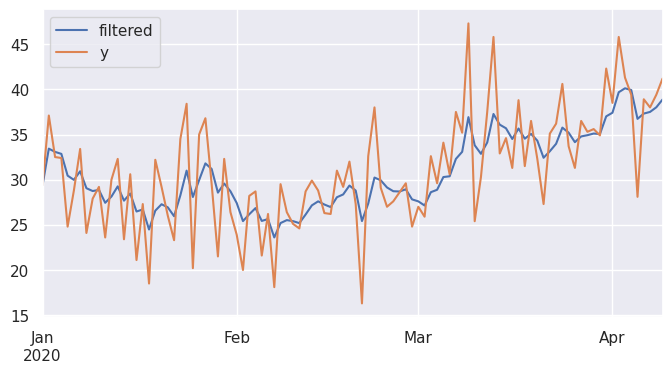

In [9]:
local_level.plot_level()

In [12]:
stats.norm.rvs(loc=0, scale=1, size=10)

array([ 1.6169496 ,  0.50274088,  1.55880554,  0.1094027 ,
       -1.2197444 ,  2.44936865, -0.54577417, -0.19883786,
       -0.7003985 , -0.20339445])

In [ ]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import seaborn as sns

# グラフを描画するライブラリ
from matplotlib import pyplot as plt

sns.set()

# statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# 機械学習法
# 再帰的に回帰分析を実行するための関数の読み込み
# 周期性やトレンドの関する特徴量を作成
# グラフの日本語表記
from matplotlib import rcParams

# sktime：予測の評価指標
# sktime：予測の評価
from sktime.forecasting.model_selection import temporal_train_test_split

# sktime：予測
# sktime：パイプライン
# sktime：データの変換
# sktime：グラフ描画
from sktime.utils.plotting import plot_series

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = "Meiryo"

In [ ]:
# 表示設定
np.set_printoptions(linewidth=60)
pd.set_option("display.width", 80)

from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 8, 4

# Warningを出力させないようにする
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# オオヤマネコデータの読み込み
lynx = sm.datasets.get_rdataset("lynx").data

# 日付インデックスの作成(PeriodIndex)
date_index = pd.period_range(start="1821-01", periods=len(lynx), freq="Y")
lynx.index = date_index

# 不要な時間ラベルの削除
lynx = lynx.drop(lynx.columns[0], axis=1)

# 結果の確認
print(lynx.head(10))

      value
1821    269
1822    321
1823    585
1824    871
1825   1475
1826   2821
1827   3928
1828   5943
1829   4950
1830   2577


findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not found because none of the following families were found: Meiryo
findfont: Generic family 'sans-serif' not foun

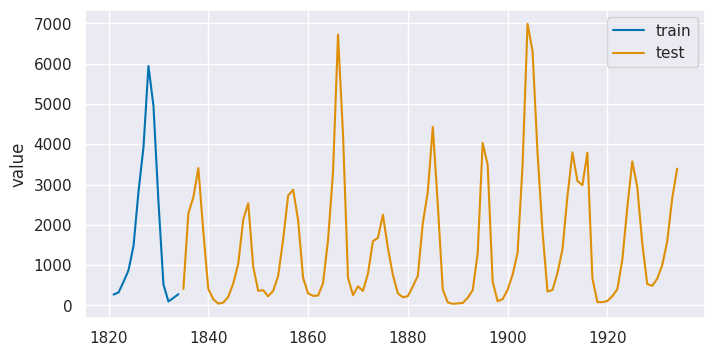

In [ ]:
# 訓練データとテストデータに分割する
fig, ax = plot_series(
    train_lynx, test_lynx, labels=["train", "test"], markers=np.tile("", 2)
)

fig.set_size_inches(8, 4)
fig, ax = plot_series(train_lynx, test_lynx, 
                      labels=['train', 'test'], markers=np.tile('', 2))

# グラフサイズの指定
fig.set_size_inches(8, 4)